In [14]:
import pandas as pd
from pathlib import Path
import numpy as np

In [15]:
data_path=Path('D:\\python_algorithm\\machinelearinginaction\\《机器学习实战》Python3代码\\Ch05')

In [16]:
#5.2.2 训练算法：梯度上升

In [17]:
def loadDataSet():
    dataMat,labelMat = [],[]
    fr = open(data_path / 'testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [28]:
def sigmoid(inX):
    return 1.0/(1 + np.exp(-inX))

In [29]:
def gradAscent(dataMatIn,classLabels):
    dataMatrix = np.mat(dataMatIn)               #转换为numpy的矩阵
    labelMat = np.mat(classLabels).transpose()
    m,n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

In [30]:
dataArr,labelMat = loadDataSet()

In [34]:
weights = gradAscent(dataArr,labelMat)

In [32]:
#5.2.3 画出决策边界

In [55]:
def plotBestFit(wei):
    import matplotlib.pyplot as plt
    dataMat,labelMat = loadDataSet()
    
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    
    xcord1,ycord1 = [],[]
    xcord2,ycord2 = [],[]
    
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
            
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    
    x = np.arange(-3.0,3.0,0.1)
    y = (-weights[0] - weights[1] * x)/weights[2]
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

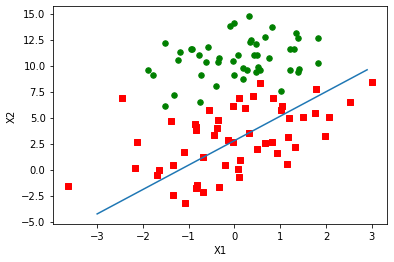

In [56]:
plotBestFit(weights)

In [43]:
#5.2.4 训练算法：随机梯度上升

In [44]:
def stocGradAscent0(dataMatrix,classLabels):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

In [47]:
dataArr,labelMat = loadDataSet()

In [49]:
weights = stocGradAscent0(np.array(dataArr),labelMat)

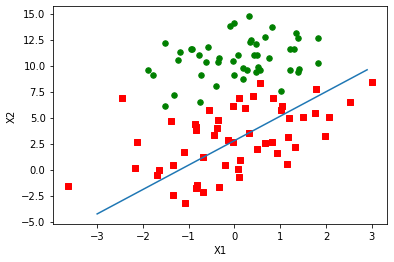

In [57]:
plotBestFit(weights)

In [67]:
def stocGradAscent1(dataMatrix,classLabels,numIter=150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(np.random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

In [68]:
dataArr,labelMat = loadDataSet()

In [69]:
weights = stocGradAscent1(np.array(dataArr),labelMat)

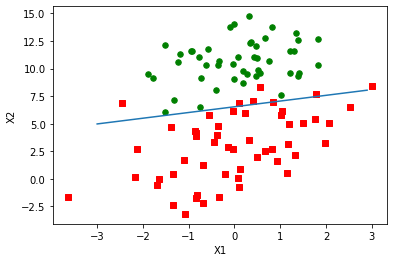

In [70]:
plotBestFit(weights)